<a href="https://colab.research.google.com/github/RohanSaxena14/facial_keypoint_detection/blob/master/facial_keypoints_15_points_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget https://github.com/shubham0204/Dataset_Archives/blob/master/face_landmarks_cleaned.zip?raw=true -O data.zip
!unzip data.zip

In [0]:
import numpy as np
import tensorflow as tf

x_train = np.load("face_landmarks_cleaned/x_train.npy")/255
y_train = np.load("face_landmarks_cleaned/y_train.npy")/96
x_test = np.load("face_landmarks_cleaned/x_test.npy")/255
y_test = np.load("face_landmarks_cleaned/y_test.npy")/96

y_train = np.reshape( y_train , ( -1 , 1 , 1 , 30 ))
y_test = np.reshape( y_test , ( -1 , 1 , 1 , 30 ))

In [0]:
model = tf.keras.Sequential([
                            tf.keras.layers.Conv2D( 256 , input_shape=( 96 , 96 , 1 ) , kernel_size=( 3 , 3 ) , strides=2 , activation='relu' ),
                            tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=2 , activation='relu' ),
                            tf.keras.layers.BatchNormalization(),

                            tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
                            tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
                            tf.keras.layers.BatchNormalization(),

                            tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
                            tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
                            tf.keras.layers.BatchNormalization(),

                            tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
                            tf.keras.layers.Conv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
                            tf.keras.layers.BatchNormalization(),

                            tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
                            tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
                            tf.keras.layers.BatchNormalization(),

                            tf.keras.layers.Conv2D( 30 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
                            tf.keras.layers.Conv2D( 30 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
                            tf.keras.layers.Conv2D( 30 , kernel_size=( 3 , 3 ) , strides=1 )

])

In [0]:
model.compile( loss=tf.keras.losses.mean_squared_error , optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) , metrics=[ 'mse' ] )

In [0]:
model.fit(x_train, y_train, epochs = 250, batch_size = 50)

Epoch 1/250
30/30 [==============================] - 4s 146ms/step - loss: 0.2528 - mse: 0.2528
Epoch 2/250
30/30 [==============================] - 3s 115ms/step - loss: 0.0888 - mse: 0.0888
Epoch 3/250
30/30 [==============================] - 3s 115ms/step - loss: 0.0445 - mse: 0.0445
Epoch 4/250
30/30 [==============================] - 3s 115ms/step - loss: 0.0275 - mse: 0.0275
Epoch 5/250
30/30 [==============================] - 3s 116ms/step - loss: 0.0199 - mse: 0.0199
Epoch 6/250
30/30 [==============================] - 3s 116ms/step - loss: 0.0152 - mse: 0.0152
Epoch 7/250
30/30 [==============================] - 3s 115ms/step - loss: 0.0120 - mse: 0.0120
Epoch 8/250
30/30 [==============================] - 3s 115ms/step - loss: 0.0098 - mse: 0.0098
Epoch 9/250
30/30 [==============================] - 3s 116ms/step - loss: 0.0085 - mse: 0.0085
Epoch 10/250
30/30 [==============================] - 3s 117ms/step - loss: 0.0073 - mse: 0.0073
Epoch 11/250
30/30 [===================

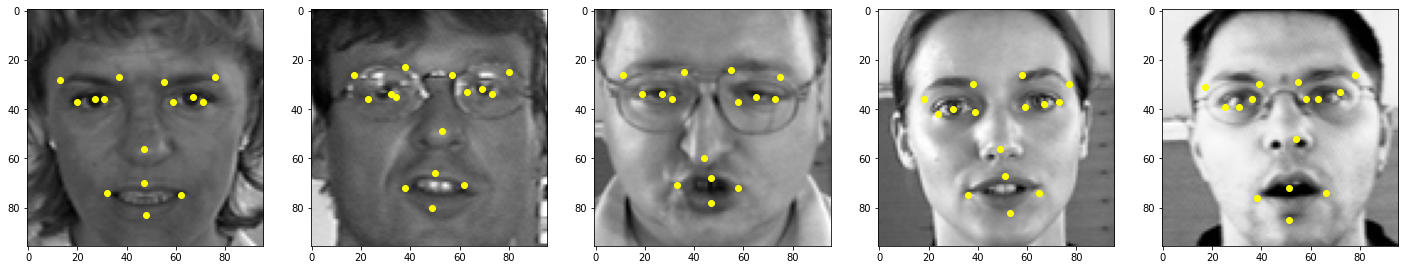

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=( 50 , 50 ))

for i in range( 1 , 6 ):
    sample_image = np.reshape( x_test[i] * 255  , ( 96 , 96 ) ).astype( np.uint8 )
    pred = model.predict( x_test[ i : i +1  ] ) * 96
    pred = pred.astype( np.int32 )
    pred = np.reshape( pred[0 , 0 , 0 ] , ( 15 , 2 ) )
    fig.add_subplot( 1 , 10 , i )
    plt.imshow( sample_image.T , cmap='gray' )
    plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )
    
plt.show()

In [0]:
!wget https://www.makeup.com/-/media/project/loreal/brand-sites/mdc/americas/us/articles/2018/september/11-ultimate-makeup/the-ultimate-makeup-tutorial-eyeshadow-lipstick-face-hero-mudc-091118_r2.jpg -O image.jpg

--2020-05-10 10:36:47--  https://www.makeup.com/-/media/project/loreal/brand-sites/mdc/americas/us/articles/2018/september/11-ultimate-makeup/the-ultimate-makeup-tutorial-eyeshadow-lipstick-face-hero-mudc-091118_r2.jpg
Resolving www.makeup.com (www.makeup.com)... 104.18.6.37, 104.18.7.37
Connecting to www.makeup.com (www.makeup.com)|104.18.6.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44935 (44K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  43.88K  --.-KB/s    in 0s      

2020-05-10 10:36:48 (87.4 MB/s) - ‘image.jpg’ saved [44935/44935]



In [0]:
x_test[ i : i +1  ].shape

(1, 96, 96, 1)

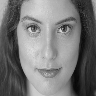

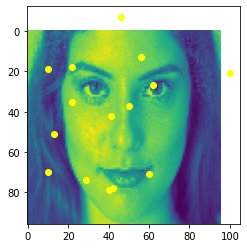

In [0]:
import cv2
from google.colab.patches import cv2_imshow

sample_image = cv2.imread("/content/image.jpg", 0)

sample_image = cv2.resize(sample_image, (96,96), interpolation = cv2.INTER_CUBIC)

cv2_imshow(sample_image)

image = sample_image.reshape((1, 96, 96, 1))

pred = model.predict(image/255) * 96

pred = pred.astype( np.int32 )

pred = np.reshape( pred[0 , 0 , 0 ] , ( 15 , 2 ) )

plt.imshow( sample_image )
plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )    